## Keras Apuntes
Este notebook sirve para representar los ejemplos del manual de Keras para el módulo 7 del Master de Inteligencia Artificial aplicada al Deporte.

###Modelo Introducción


In [2]:
!pip install tensorflow
!pip install keras
from tensorflow.keras import models, optimizers, layers
from keras.datasets import mnist, imdb
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import loadtxt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print("Rango: " + str(train_images.ndim))
print("Dimensiones: " + str(train_images.shape))
print("Tipo de dato: " + str(train_images.dtype))

Rango: 3
Dimensiones: (60000, 28, 28)
Tipo de dato: uint8


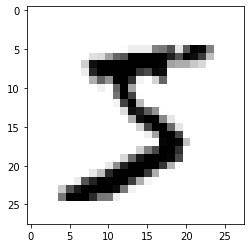

In [5]:
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
print(train_images[10:100].shape)
print(train_images[:, 14:, 14:].shape)

(90, 28, 28)
(60000, 14, 14)


In [7]:
# load the dataset
dataset = loadtxt('/content/drive/My Drive/MasterIADeporte/Modulo7_KERAS/diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [8]:
# Caso 1: Sequential Model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_dim=8))
model.add(layers.Dense(1, activation='sigmoid'))

# Configuración
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento
model.fit(X, y, batch_size=10, epochs=150)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
1/1 [==============================] - 1s 760ms/step - loss: 5.9112 - accuracy: 0.6000
Epoch 2/150
1/1 [==============================] - 0s 6ms/step - loss: 5.3728 - accuracy: 0.6000
Epoch 3/150
1/1 [==============================] - 0s 6ms/step - loss: 4.8373 - accuracy: 0.6000
Epoch 4/150
1/1 [==============================] - 0s 5ms/step - loss: 4.3034 - accuracy: 0.6000
Epoch 5/150
1/1 [==============================] - 0s 6ms/step - loss: 3.7711 - accuracy: 0.6000
Epoch 6/150
1/1 [==============================] - 0s 13ms/step - loss: 3.2418 - accuracy: 0.6000
Epoch 7/150
1/1 [==============================] - 0s 8ms/step - loss: 2.7224 - accuracy: 0.6000
Epoch 8/150
1/1 [==============================] - 0s 7ms/step - loss: 2.2263 - accuracy: 0.6000
Epoch 9/150
1/1 [==============================] - 0s 8ms/step - loss: 1.7712 - accuracy: 0.6000
Epoch 10/150
1/1 [==============================] - 0s 8ms/step - loss: 1.4067 - accuracy: 0.6000
Epoch 11/150
1/1 [========

In [9]:
# Caso 2: Functional API
input_tensor = layers.Input(shape=(8,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

# Configuración
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# Entrenamiento
model.fit(X, y, batch_size=128, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 470ms/step - loss: 0.5711 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5800 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.5800 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 0.5800 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5800 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5799 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.5798 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5786 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 0.5692 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5606 - accuracy: 0.0000

### Clasificación binaria en KERAS
#### Dataset IMDB

In [10]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Primer ejemplo: " + str(train_data[0]))
print("Primer label: " + str(train_labels[0]))

17473536/17464789 [==============================] - 0s 0us/step
Primer ejemplo: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16

In [11]:
# Diccionario que asocia palabras a su índice
word_index = imdb.get_word_index()
# Lo invertimos para asociar los índices a palabras
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
# Lo decodificamos, teniendo en cuenta que los índices tienen un offset de 3
# porque 0, 1 y 2 significan "padding", "inicio de secuencia" y "desconocido".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

1654784/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  # Inicialización de la matriz de ceros(len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # en los índices contenidos, el valor será 1
  return results

# Vectorizamos train y test
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# También transformamos nuestras etiquetas a tensores
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=5,
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/5
30/30 [==============================] - 2s 49ms/step - loss: 0.5447 - accuracy: 0.7669 - val_loss: 0.4130 - val_accuracy: 0.8722
Epoch 2/5
30/30 [==============================] - 1s 36ms/step - loss: 0.3260 - accuracy: 0.9012 - val_loss: 0.3105 - val_accuracy: 0.8867
Epoch 3/5
30/30 [==============================] - 1s 36ms/step - loss: 0.2316 - accuracy: 0.9248 - val_loss: 0.2805 - val_accuracy: 0.8922
Epoch 4/5
30/30 [==============================] - 1s 37ms/step - loss: 0.1776 - accuracy: 0.9438 - val_loss: 0.2961 - val_accuracy: 0.8815
Epoch 5/5
30/30 [==============================] - 1s 36ms/step - loss: 0.1436 - accuracy: 0.9533 - val_loss: 0.2935 - val_accuracy: 0.8843


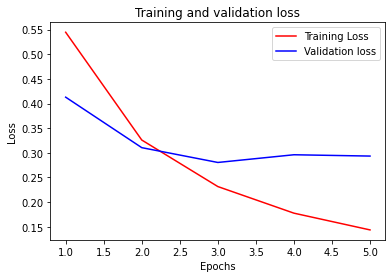

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 6)

# "r": solid red line
plt.plot(epochs, loss, 'r', label='Training Loss')
# "b": solid blue line
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

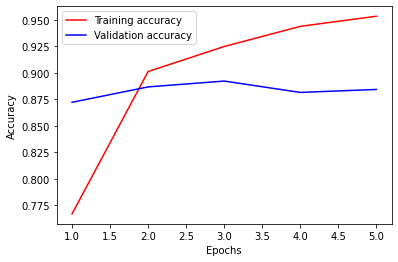

In [17]:
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
results = model.evaluate(x_test, y_test)
print("Resultados: " + str(results))
preds = model.predict(x_test)
print("Ejemplos de predcciones: ")
print(preds[:5])

782/782 [==============================] - 2s 2ms/step - loss: 0.3208 - accuracy: 0.8728
Resultados: [0.3208463490009308, 0.8728399872779846]
Ejemplos de predcciones: 
[[0.15607974]
 [0.99612325]
 [0.7552047 ]
 [0.5992185 ]
 [0.8817991 ]]


### Clasificación Multiclase en Keras
#### Dataset noticias Reuters

In [19]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print("Primer ejemplo: " + str(train_data[0]))
print("Segundo ejemplo: " + str(train_labels[0]))

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Índices con offset de 3 porque 0, 1 y 2 significan "padding", "inicio de frase"
# y "desconocido"
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Primer ejemplo decodificado: ")
print(decoded_newswire)

2121728/2110848 [==============================] - 0s 0us/step
Primer ejemplo: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Segundo ejemplo: 3
565248/550378 [==============================] - 0s 0us/step
Primer ejemplo decodificado: 
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [20]:
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
  # Inicialización de la matriz de ceros(len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # en los índices contenidos, el valor será 1
  return results

# Vectorizamos train y test
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorizamos etiquetas de train y test
ohe_train_labels = to_categorical(train_labels)
ohe_test_labels = to_categorical(test_labels)

print("Primer ejemplo vectorizado: " + str(x_train[0]))
print("Primer target vectorizado: " + str(ohe_train_labels[0]))

Primer ejemplo vectorizado: [0. 1. 1. ... 0. 0. 0.]
Primer target vectorizado: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [22]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = ohe_train_labels[:1000]
partial_y_train = ohe_train_labels[1000:]

In [23]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20,
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 0.4369 - accuracy: 0.0040 - val_loss: 0.1994 - val_accuracy: 0.0350
Epoch 2/20
16/16 [==============================] - 1s 52ms/step - loss: 0.1356 - accuracy: 0.4277 - val_loss: 0.0977 - val_accuracy: 0.5090
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 0.0796 - accuracy: 0.5566 - val_loss: 0.0680 - val_accuracy: 0.6070
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.0576 - accuracy: 0.6601 - val_loss: 0.0530 - val_accuracy: 0.6510
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.0455 - accuracy: 0.7088 - val_loss: 0.0449 - val_accuracy: 0.6870
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.0376 - accuracy: 0.7503 - val_loss: 0.0393 - val_accuracy: 0.7370
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.0318 - accuracy: 0.7923 - val_loss: 0.0363 - val_accuracy: 0.7670
Epoch 8/20
16

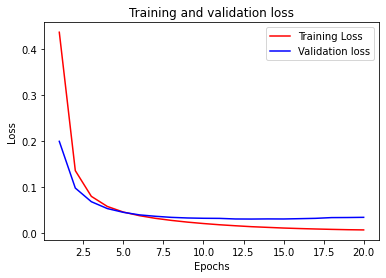

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "r": solid red line
plt.plot(epochs, loss, 'r', label='Training Loss')
# "b": solid blue line
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

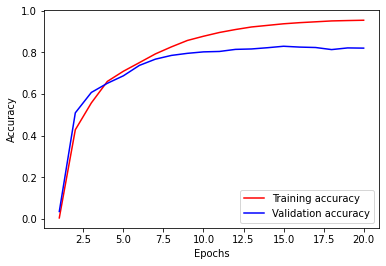

In [25]:
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

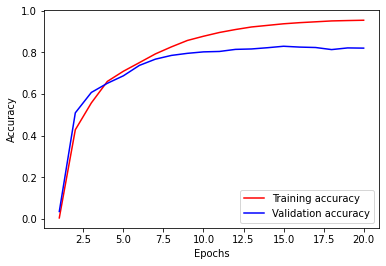

In [26]:
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
results = model.evaluate(x_test, ohe_test_labels)
print("Resultados: " + str(results))
preds = model.predict(x_test)
print("Ejemplos de predcciones: ")
print(preds[:5])

71/71 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.7881
Resultados: [0.03865940868854523, 0.7880676984786987]
Ejemplos de predcciones: 
[[1.72968532e-06 2.95661994e-06 5.10867526e-09 9.90848184e-01
  8.61007906e-03 2.67915789e-06 2.34002414e-07 2.58605269e-06
  2.24395568e-04 4.49981508e-06 4.55025003e-07 1.91214771e-04
  8.27252825e-06 1.40720499e-06 4.13324915e-06 2.66346079e-09
  7.29313513e-07 3.30849957e-07 6.21824483e-07 2.74337126e-05
  3.04061396e-05 1.06762463e-05 9.31974213e-08 9.62445029e-07
  4.55484113e-08 4.86049294e-06 2.13376383e-09 7.59169154e-07
  5.17933131e-07 1.71233876e-06 2.34732079e-06 4.90590935e-07
  4.55143478e-09 3.83509104e-07 1.79332324e-06 3.26357281e-06
  4.35697575e-06 2.85742310e-08 1.83004886e-06 1.11349539e-06
  1.01431814e-08 1.06247842e-06 9.41394376e-07 4.24272137e-08
  1.31696694e-07 1.94743322e-07]
 [2.79839005e-04 5.64799719e-02 2.65246831e-06 5.74977264e-07
  5.21330585e-05 1.66863587e-03 2.80789754e-05 1.5483865

## Regresión
### Boston Housing Price

In [28]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print("Train: " + str(train_data.shape))
print("Test: " + str(test_data.shape))

65536/57026 [==================================] - 0s 0us/step
Train: (404, 13)
Test: (102, 13)


In [29]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /=std

In [30]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = 'rmsprop', loss='mse', metrics=['mae'])
  return model

In [31]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('Procesando fold #', i)
  # Preparamos el conjunto de validación para el fold # k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  # Preparamos el conjunto de train usando el resto de subconjuntos
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], 
                                       train_data[(i + 1) * num_val_samples:]],
                                      axis = 0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], 
                                       train_targets[(i + 1) * num_val_samples:]],
                                      axis = 0)
  # Construimos el modelo
  model = build_model()
  # Entrenamos el modelo sin sacar logs
  model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, 
            batch_size = 1, verbose = 0)
  # Evaluamos el modelo con el conjunto de validación
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  # Guardamos el resultado sobre el fold en el que estamos
  all_scores.append(val_mae)

Procesando fold # 0
Procesando fold # 1
Procesando fold # 2
Procesando fold # 3


In [32]:
print(all_scores)
print(np.mean(all_scores))

[2.099520206451416, 2.1972241401672363, 2.656583070755005, 2.2919962406158447]
2.3113309144973755


In [35]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('Procesando fold #', i)
  # Preparamos el conjunto de validación para el fold # k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  # Preparamos el conjunto de train usando el resto de subconjuntos
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], 
                                       train_data[(i + 1) * num_val_samples:]],
                                      axis = 0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], 
                                       train_targets[(i + 1) * num_val_samples:]],
                                      axis = 0)
  # Construimos el modelo
  model = build_model()
  # Entrenamos el modelo sin sacar logs
  history = model.fit(partial_train_data, partial_train_targets, 
                      validation_data = (val_data, val_targets),
                      epochs = num_epochs, 
                      batch_size = 1, verbose = 0)
  
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

Procesando fold # 0
Procesando fold # 1
Procesando fold # 2
Procesando fold # 3


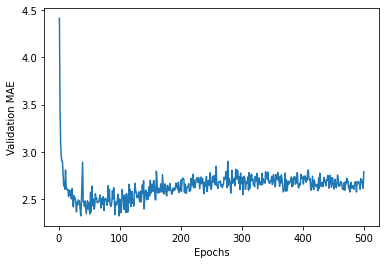

In [36]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [37]:
# Nuevo modelo
model = build_model()
# Entrenamos el modelo con el conjunto de train al completo
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print("MSE: " + str(test_mse_score))
print("MAE: " + str(test_mae_score))

4/4 [==============================] - 0s 4ms/step - loss: 19.0814 - mae: 2.7478
MSE: 19.081403732299805
MAE: 2.747798442840576


## Redes Convolucionales

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)             

In [42]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)) # Añadimos un canal
train_images = train_images.astype('float32') / 255 # Acotamos entre 0 y 1

test_images = test_images.reshape((10000, 28, 28, 1)) # Añadimos un canal
test_images = test_images.astype('float32') / 255 # Acotamos entre 0 y 1

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 54s 57ms/step - loss: 0.1705 - accuracy: 0.9466
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0456 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0306 - accuracy: 0.9910
Epoch 4/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0191 - accuracy: 0.9943


In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0422 - accuracy: 0.9880
0.9879999756813049


## Redes Neuronales Recurrentes (RNNs)

In [45]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv', engine='python')
df

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def get_train_test(url, split_percent=0.8):
  df = pd.read_csv(url, usecols=[1], engine = 'python')
  data = np.array(df.values.astype('float32'))
  scaler = MinMaxScaler(feature_range=(0, 1))
  data = scaler.fit_transform(data).flatten()
  n = len(data)

  split = int(n*split_percent)
  train_data = data[range(split)]
  test_data = data[split:]
  return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

print(f"Train: {train_data.shape}")
print(f"Test: {test_data.shape}")

Train: (2256,)
Test: (564,)


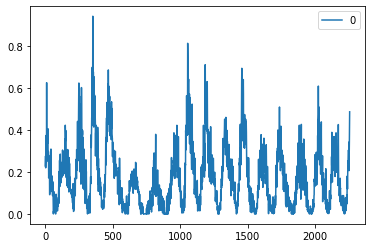

In [50]:
pd.DataFrame(train_data).plot()

In [53]:
def get_XY(dat, time_steps):
  Y_ind = np.arange(time_steps, len(dat), time_steps)
  Y = data[Y_ind]

  rows_x = len(Y)
  X = dat[range(time_steps*rows_x)]
  X = np.reshape(X, (rows_x, time_steps, 1))
  return X, Y

time_steps = 12
X_train, y_train = get_XY(train_data, time_steps)
X_test, y_test = get_XY(test_data, time_steps)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (187, 12, 1), y_train: (187,)
X_test: (46, 12, 1), y_test: (46,)


In [54]:
X_train[0]

array([[0.22852638],
       [0.24665089],
       [0.2758077 ],
       [0.21946414],
       [0.33490935],
       [0.3289992 ],
       [0.37352246],
       [0.2612293 ],
       [0.29905435],
       [0.29747832],
       [0.6249015 ],
       [0.33569738]], dtype=float32)

In [58]:
model = models.Sequential()
model.add(layers.SimpleRNN(3, input_shape=(time_steps, 1),
                    activation = 'tanh'))
model.add(layers.Dense(1, activation='tanh'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.0209 - 1s/epoch - 7ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0147 - 472ms/epoch - 3ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0111 - 486ms/epoch - 3ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0094 - 403ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0086 - 410ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0079 - 411ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0073 - 435ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0067 - 415ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0063 - 416ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0061 - 385ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0058 - 393ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0054 - 414ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0052 - 396ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0049 - 468ms/epoch - 3ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0048 - 496ms/epoch - 3ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

In [59]:
import math

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))

Train RMSE: 0.063 RMSE
Test RMSE: 0.216 RMSE


## Transfer Learning
https://keras.io/api/applications/

https://image-net.org/

In [4]:
from tensorflow.keras.applications import VGG16
VGG16(weights='imagenet').summary()

553476096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [12]:
def create_transfer_model(shapes, num_classes):
  img_input = layers.Input(shape=(shapes[0], shapes[1], 3))
  conv_base = VGG16(weights='imagenet', include_top=False, 
                    input_shape=(shapes[0], shapes[1], 3))
  conv_base.trainable = False
  x = conv_base(img_input)
  x = layers.Flatten()(x)
  x = layers.Dense(512, activation = 'relu')(x)
  out = layers.Dense(num_classes, activation = 'softmax')(x)

  model = models.Model(img_input, out)
  model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',
                metrics = 'acc')
  return model

In [13]:
model_transfer = create_transfer_model((128, 128), 4)
model_transfer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               4194816   
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 18,911,556
Trainable params: 4,196,868
Non-trainable params: 14,714,688
_________________________________________________________________


## Autoencoders

In [14]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255 # Acotamos entre 0 y 1

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255 # Acotamos entre 0 y 1

print(train_images.shape)
print(test_images.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [15]:
input_img = layers.Input(shape=(784,))

encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               1011

In [16]:
encoder = models.Model(input_img, encoded)
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [17]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(train_images, train_images, epochs=25, batch_size=256,
                shuffle=True, validation_data=(test_images, test_images))

Epoch 1/25
235/235 [==============================] - 4s 15ms/step - loss: 0.0656 - val_loss: 0.0381
Epoch 2/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0307 - val_loss: 0.0251
Epoch 3/25
235/235 [==============================] - 3s 13ms/step - loss: 0.0230 - val_loss: 0.0203
Epoch 4/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0196 - val_loss: 0.0180
Epoch 5/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0177 - val_loss: 0.0166
Epoch 6/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0163 - val_loss: 0.0154
Epoch 7/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0153 - val_loss: 0.0144
Epoch 8/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0144 - val_loss: 0.0136
Epoch 9/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0136 - val_loss: 0.0130
Epoch 10/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0130 - val_lo

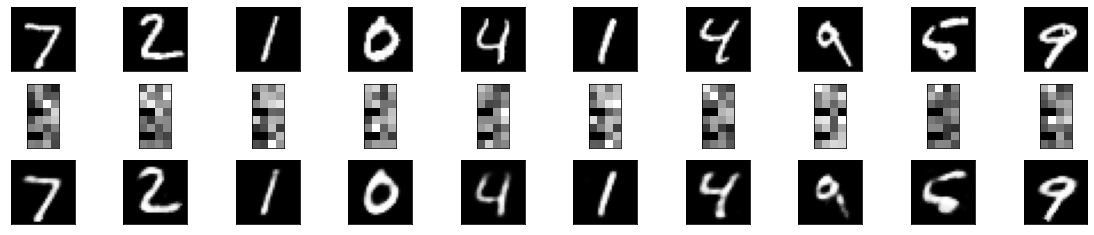

In [18]:
encoded_imgs = encoder.predict(test_images)
predicted = autoencoder.predict(test_images)

plt.figure(figsize=(40,4))
for i in range(10):
  # Imágenes originales
  ax = plt.subplot(3, 20, i + 1)
  plt.imshow(test_images[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Imágenes comprimidas
  ax = plt.subplot(3, 20, i + 1 + 20)
  plt.imshow(encoded_imgs[i].reshape(8, 4))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Imágenes reconstruidas
  ax = plt.subplot(3, 20, i + 1 + 2*20)
  plt.imshow(predicted[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

## Embeddings y Modelos Multi-Input

In [19]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print("Train: " + str(train_data.shape))
print("Test: " + str(test_data.shape))

65536/57026 [==================================] - 0s 0us/step
Train: (404, 13)
Test: (102, 13)


In [22]:
import pandas as pd

index_dict = {1:0, 2:1, 3:2, 4:3, 5:5, 6:5, 7:6, 8:7, 24:8}

train_df = pd.DataFrame(data=train_data)
test_df = pd.DataFrame(data=test_data)

train_df[8] = train_df[8].apply(lambda x: index_dict[x])
test_df[8] = test_df[8].apply(lambda x: index_dict[x])

train_data_cat = train_df[8].values
test_data_cat = test_df[8].values

train_data_num = train_df.drop(columns=[8]).values
test_data_num = test_df.drop(columns=[8]).values

print("Train")
print(train_data_cat.shape)
print(train_data_num.shape)

print("Test")
print(test_data_cat.shape)
print(test_data_num.shape)

Train
(404,)
(404, 12)
Test
(102,)
(102, 12)


In [23]:
print(train_data_cat[:15])
print(test_data_cat[:15])

mean = train_data_num.mean(axis=0)
std = train_data_num.std(axis=0)
train_data_num = (train_data_num - mean) / std
test_data_num = (test_data_num - mean) / std

[3 1 8 5 8 5 8 5 5 3 8 8 5 8 1]
[8 5 5 5 2 5 5 3 1 8 5 3 3 2 8]


In [26]:
input_num = layers.Input(shape=(12,))
input_cat = layers.Input(shape=(1,))

embedded_cat = layers.Embedding(input_dim=9, output_dim=5)(input_cat)
embedded_cat = layers.Flatten()(embedded_cat)
x = layers.Concatenate()([input_num, embedded_cat])
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x)

model = models.Model(inputs=[input_num, input_cat], outputs = output)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 5)         45          ['input_14[0][0]']               
                                                                                                  
 input_13 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 flatten_5 (Flatten)            (None, 5)            0           ['embedding_2[0][0]']            
                                                                                            

In [27]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit([train_data_num, train_data_cat], train_targets, epochs=25, batch_size=16)

Epoch 1/25
26/26 [==============================] - 1s 2ms/step - loss: 487.0222 - mae: 20.0632
Epoch 2/25
26/26 [==============================] - 0s 2ms/step - loss: 300.2466 - mae: 15.0046
Epoch 3/25
26/26 [==============================] - 0s 2ms/step - loss: 131.5013 - mae: 9.0038
Epoch 4/25
26/26 [==============================] - 0s 2ms/step - loss: 52.7867 - mae: 5.3941
Epoch 5/25
26/26 [==============================] - 0s 2ms/step - loss: 33.2998 - mae: 4.1106
Epoch 6/25
26/26 [==============================] - 0s 2ms/step - loss: 25.0594 - mae: 3.3881
Epoch 7/25
26/26 [==============================] - 0s 2ms/step - loss: 21.5612 - mae: 3.0933
Epoch 8/25
26/26 [==============================] - 0s 3ms/step - loss: 18.9813 - mae: 2.9289
Epoch 9/25
26/26 [==============================] - 0s 3ms/step - loss: 17.9196 - mae: 2.8552
Epoch 10/25
26/26 [==============================] - 0s 3ms/step - loss: 16.0983 - mae: 2.7140
Epoch 11/25
26/26 [==============================] - 0

In [28]:
model.predict([test_data_num, test_data_cat])

array([[ 9.185706 ],
       [18.69561  ],
       [21.478607 ],
       [33.958927 ],
       [25.74039  ],
       [19.3858   ],
       [26.658546 ],
       [21.185633 ],
       [18.893734 ],
       [22.214914 ],
       [19.670715 ],
       [17.166609 ],
       [17.651852 ],
       [43.59952  ],
       [19.587067 ],
       [19.984629 ],
       [27.453444 ],
       [20.705505 ],
       [18.90313  ],
       [31.53751  ],
       [13.140811 ],
       [17.009974 ],
       [20.776672 ],
       [15.441512 ],
       [20.670052 ],
       [25.104946 ],
       [30.655113 ],
       [31.282328 ],
       [11.854772 ],
       [20.598476 ],
       [20.476501 ],
       [16.11483  ],
       [34.22513  ],
       [25.530931 ],
       [18.269623 ],
       [ 9.499782 ],
       [15.988037 ],
       [19.871094 ],
       [26.623863 ],
       [26.908184 ],
       [30.266874 ],
       [25.815897 ],
       [15.755483 ],
       [41.509666 ],
       [32.261654 ],
       [25.474926 ],
       [27.4001   ],
       [16.32